# 1 准备可能会用到的库
###### Plotly是一个用于创建交互式图表的库。它支持多种图表类型，并且可以在不同的环境（如Jupyter Notebook）中进行展示。download_plotlyjs是用于下载Plotly的JavaScript库，以便在离线模式下工作。

In [1]:
from plotly.offline import download_plotlyjs, init_notebook_mode
init_notebook_mode(connected=True) 
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.offline as pyo
pyplot = py.offline.iplot
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False




# 2 读一下数据

In [2]:
data = pd.read_csv('tmall_order_report.csv',encoding='gbk')
data.head()


,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额
0,1,178.8,0.0,上海,2020/2/21 0:00,NaN,0.0
1,2,21.0,21.0,内蒙古自治区,2020/2/20 23:59,2020/2/21 0:00,0.0
2,3,37.0,0.0,安徽省,2020/2/20 23:59,NaN,0.0
3,4,157.0,157.0,湖南省,2020/2/20 23:58,2020/2/20 23:58,0.0
4,5,64.8,0.0,江苏省,2020/2/20 23:57,2020/2/20 23:57,64.8


In [3]:
data.info

<bound method DataFrame.info of         订单编号    总金额  买家实际支付金额   收货地址            订单创建时间          订单付款时间   退款金额
0          1  178.8       0.0      上海   2020/2/21 0:00              NaN   0.0
1          2   21.0      21.0  内蒙古自治区  2020/2/20 23:59   2020/2/21 0:00   0.0
2          3   37.0       0.0     安徽省  2020/2/20 23:59              NaN   0.0
3          4  157.0     157.0     湖南省  2020/2/20 23:58  2020/2/20 23:58   0.0
4          5   64.8       0.0     江苏省  2020/2/20 23:57  2020/2/20 23:57  64.8
...      ...    ...       ...     ...              ...              ...   ...
28005  28006   37.0      37.0     四川省   2020/2/27 0:01   2020/2/27 0:01   0.0
28006  28007   69.0       0.0      上海   2020/2/27 0:00              NaN   0.0
28007  28008   69.0       0.0      上海   2020/2/27 0:00              NaN   0.0
28008  28009   37.0      37.0     辽宁省   2020/2/27 0:00   2020/2/27 0:00   0.0
28009  28010   37.0      37.0     广东省   2020/2/27 0:00   2020/2/27 0:00   0.0

[28010 rows x 7 columns]>

# 3 数据预处理

In [4]:

data.rename(columns={'收货地址 ': '收货地址', '订单付款时间 ':'订单付款时间'}, inplace=True)
data.columns


Index(['订单编号', '总金额', '买家实际支付金额', '收货地址', '订单创建时间', '订单付款时间', '退款金额'], dtype='object')

In [5]:
data['订单创建时间'] = pd.to_datetime(data['订单创建时间'])
data['订单付款时间'] = pd.to_datetime(data['订单付款时间'])
# '订单创建时间’、’订单付款时间’的类型是object，将其改成日期格式，后续方便分析

In [6]:
data['创建时间'] = data['订单创建时间'].dt.strftime('%m月%d日')
data['付款时间'] = data['订单付款时间'].dt.strftime('%m月%d日')
data.head()
# 这里我们需要的 只是 月、日两个字段，所以从 创建时间、付款时间中 直接截出来

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额,创建时间,付款时间
0,1,178.8,0.0,上海,2020-02-21 00:00:00,NaT,0.0,02月21日,NaN
1,2,21.0,21.0,内蒙古自治区,2020-02-20 23:59:00,2020-02-21 00:00:00,0.0,02月20日,02月21日
2,3,37.0,0.0,安徽省,2020-02-20 23:59:00,NaT,0.0,02月20日,NaN
3,4,157.0,157.0,湖南省,2020-02-20 23:58:00,2020-02-20 23:58:00,0.0,02月20日,02月20日
4,5,64.8,0.0,江苏省,2020-02-20 23:57:00,2020-02-20 23:57:00,64.8,02月20日,02月20日


In [7]:
# 创建函数，用来将weekday返回的数字转化为对应星期几。
def to_weekday(a):
    result = np.nan
    if a == 0:
        result = '周一'
    elif a == 1:
        result = '周二'
    elif a == 2:
        result = '周三'      
    elif a == 3:
        result = '周四'
    elif a == 4:
        result = '周五'
    elif a == 5:
        result = '周六'
    elif a == 6:
        result = '周日'
    return result


In [8]:
data['创建星期'] = data['订单创建时间'].dt.weekday.apply(to_weekday)
data['创建时刻'] = data['订单创建时间'].dt.hour
data['付款星期'] = data['订单付款时间'].dt.weekday.apply(to_weekday)
data['付款时刻'] = data['订单付款时间'].dt.hour
data.head()


,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额,创建时间,付款时间,创建星期,创建时刻,付款星期,付款时刻
0,1,178.8,0.0,上海,2020-02-21 00:00:00,NaT,0.0,02月21日,NaN,周五,0,NaN,NaN
1,2,21.0,21.0,内蒙古自治区,2020-02-20 23:59:00,2020-02-21 00:00:00,0.0,02月20日,02月21日,周四,23,周五,0.0
2,3,37.0,0.0,安徽省,2020-02-20 23:59:00,NaT,0.0,02月20日,NaN,周四,23,NaN,NaN
3,4,157.0,157.0,湖南省,2020-02-20 23:58:00,2020-02-20 23:58:00,0.0,02月20日,02月20日,周四,23,周四,23.0
4,5,64.8,0.0,江苏省,2020-02-20 23:57:00,2020-02-20 23:57:00,64.8,02月20日,02月20日,周四,23,周四,23.0


# 4 精简地址


In [9]:

data['收货地址'].unique()
data['收货地址'] = data['收货地址'].str.replace('省','').str.replace('自治区','')
data['收货地址'] = data['收货地址'].str.replace('壮族','').str.replace('维吾尔','').str.replace('回族','')
data['收货地址'].unique()


array(['上海', '内蒙古', '安徽', '湖南', '江苏', '浙江', '天津', '北京', '四川', '贵州', '辽宁',
       '河南', '广西', '广东', '福建', '海南', '江西', '甘肃', '河北', '黑龙江', '云南', '重庆',
       '山西', '吉林', '山东', '陕西', '湖北', '青海', '新疆', '宁夏', '西藏'], dtype=object)

# 5 缺失值处理

In [10]:

sum(data['订单付款时间'].isnull())

sum(data['订单付款时间'].isnull()) / data.shape[0]


0.14005712245626561

In [11]:
# 检查其他有误数据
data[data['订单付款时间'].isnull() & data['买家实际支付金额']>0].size

0

检查得知’订单付款时间’为空的时候，实际付款金额都为0，没有出现错误数据。实际生活中存在下单但是不付款的情况，缺失比例也没有超出预期，判断不需要对其进行处理。


# 6 异常值分析


In [12]:
data.describe()

,订单编号,总金额,买家实际支付金额,订单创建时间,订单付款时间,退款金额,创建时刻,付款时刻
count,28010.000000,28010.000000,28010.000000,28010,24087,28010.000000,28010.000000,24087.000000
mean,14005.500000,106.953253,67.921712,2020-02-23 07:26:54.192788224,2020-02-23 06:40:37.972350464,20.433271,14.603749,14.605804
min,1.000000,1.000000,0.000000,2020-02-01 00:14:00,2020-02-01 00:14:00,0.000000,0.000000,0.000000
25%,7003.250000,38.000000,0.000000,2020-02-21 14:23:15,2020-02-21 14:22:30,0.000000,11.000000,11.000000
50%,14005.500000,75.000000,45.000000,2020-02-24 21:58:30,2020-02-24 22:17:00,0.000000,15.000000,15.000000
75%,21007.750000,119.000000,101.000000,2020-02-27 09:38:45,2020-02-27 10:05:30,0.000000,20.000000,20.000000
max,28010.000000,188320.000000,16065.000000,2020-02-29 23:59:00,2020-03-01 19:25:00,3800.000000,23.000000,23.000000
std,8085.934856,1136.587094,151.493434,NaN,NaN,71.501963,6.150971,6.103103


从上表可以看到‘总金额’的最大值远远超过75%分位数，怀疑是异常值。

画个箱线图辅助判断

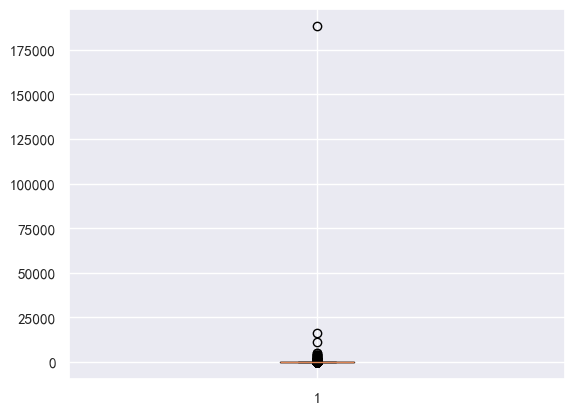

In [13]:
plt.boxplot(data['总金额'])
plt.show()


可以看到‘总金额’>175000的数据远离上极限，且25000到175000中间都是空白，判断总金额>175000的为异常值。

In [14]:
data[data['总金额'] > 175000]


,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额,创建时间,付款时间,创建星期,创建时刻,付款星期,付款时刻
19257,19258,188320.0,0.0,上海,2020-02-24 19:35:00,NaT,0.0,02月24日,NaN,周一,19,NaN,NaN


‘总金额’大于175000的数据只有一条，并且没有付款，很有可能是乱点的，将其删除。



In [15]:
data = data.drop(index=data[data['总金额'] > 17500].index)
data.shape
(28009, 13)


(28009, 13)

买家实际支付金额’异常值处理

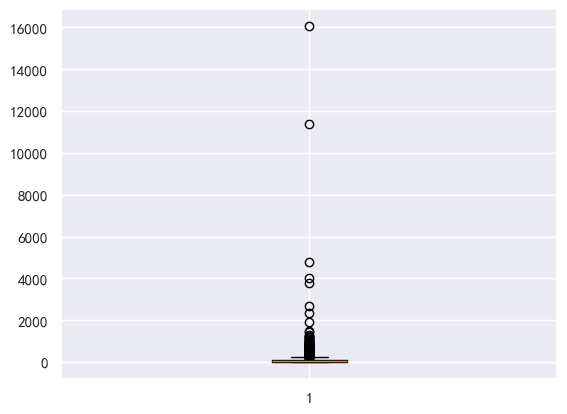

In [16]:
plt.boxplot(data['买家实际支付金额'])
plt.show()


显然有两个点 偏离较大（>6000）。那么就
查看实际支付金额大于6000的数据：


In [17]:
data[data['买家实际支付金额'] > 6000]


,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额,创建时间,付款时间,创建星期,创建时刻,付款星期,付款时刻
3143,3144,11400.0,11400.0,江苏,2020-02-18 09:34:00,2020-02-18 09:34:00,0.0,02月18日,02月18日,周二,9,周二,9.0
13511,13512,16065.0,16065.0,内蒙古,2020-02-26 15:41:00,2020-02-26 15:42:00,0.0,02月26日,02月26日,周三,15,周三,15.0


只有2条数据，而且金额没有太高到不可接受。所以可以认为是合理的
再看退款金额

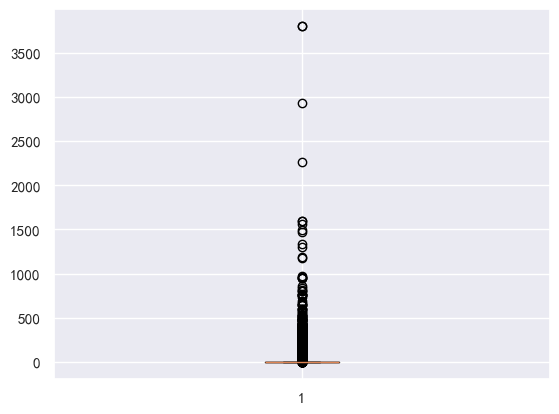

In [18]:
plt.boxplot(data['退款金额'])
plt.show()


In [19]:
data[data['退款金额'] > 2000]


,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额,创建时间,付款时间,创建星期,创建时刻,付款星期,付款时刻
3841,3842,3800.0,0.0,广东,2020-02-09 23:50:00,2020-02-10 00:52:00,3800.0,02月09日,02月10日,周日,23,周一,0.0
5764,5765,3800.0,0.0,河南,2020-02-02 16:52:00,2020-02-02 16:52:00,3800.0,02月02日,02月02日,周日,16,周日,16.0
10163,10164,2930.2,0.0,山东,2020-02-22 01:59:00,2020-02-22 01:59:00,2930.2,02月22日,02月22日,周六,1,周六,1.0
24941,24942,2260.0,0.0,安徽,2020-02-28 09:52:00,2020-02-28 09:52:00,2260.0,02月28日,02月28日,周五,9,周五,9.0


退款金额=总金额，没有出现数据错误，而且数量少，符合生活中的实际情况，不处理

# 7 数据分析

'订单付款时间’为空的代表买家没有付款，对应的’买家实际支付金额’为0的在描述性统计时应当成空值而不是0；
‘退款金额’为0代表没有退款，在进行描述性统计时也应当成空值处理。

In [20]:
data_desc = data.copy()
data_desc['买家实际支付金额'] = np.where(data_desc['订单付款时间'].isnull(), np.nan, data_desc['买家实际支付金额'])
data_desc['退款金额'] = data_desc['退款金额'].replace(0, np.nan)
data_desc.describe()


,订单编号,总金额,买家实际支付金额,订单创建时间,订单付款时间,退款金额,创建时刻,付款时刻
count,28009.000000,28009.000000,24087.000000,28009,24087,5646.000000,28009.000000,24087.000000
mean,14005.312471,100.233518,78.983981,2020-02-23 07:26:49.548359424,2020-02-23 06:40:37.972350464,101.370159,14.603592,14.605804
min,1.000000,1.000000,0.000000,2020-02-01 00:14:00,2020-02-01 00:14:00,1.000000,0.000000,0.000000
25%,7003.000000,38.000000,31.850000,2020-02-21 14:23:00,2020-02-21 14:22:30,38.000000,11.000000,11.000000
50%,14005.000000,75.000000,59.000000,2020-02-24 21:59:00,2020-02-24 22:17:00,76.000000,15.000000,15.000000
75%,21008.000000,119.000000,112.000000,2020-02-27 09:39:00,2020-02-27 10:05:30,119.000000,20.000000,20.000000
max,28010.000000,16065.000000,16065.000000,2020-02-29 23:59:00,2020-03-01 19:25:00,3800.000000,23.000000,23.000000
std,8086.018294,164.451538,160.668911,NaN,NaN,130.999959,6.151025,6.103103


In [21]:
# 看一下总体情况-- 总支付数
np.sum(data['买家实际支付金额'])


1902487.15

In [22]:



# 计算每天的 GMV 总和
GMV_day = data[data['付款时间'] != 'NaT'].groupby('付款时间')['总金额'].sum()

# 计算每天的订单数量
order_day = data[data['付款时间'] != 'NaT'].groupby('付款时间')['订单编号'].count()

# 创建一个新的 DataFrame 来存储每天的 GMV 和订单数量
summary_data = pd.DataFrame({
    'GMV': GMV_day,
    '订单数': order_day
})

trace1 = go.Scatter(x=GMV_day.index, 
                    y=GMV_day, 
                    mode='lines',
                    marker=dict(color='orange'),
                    name='销售额'
                   )

trace2 = go.Bar(x=order_day.index, 
                y=order_day,
                name='订单数',
                opacity=0.7, 
                marker=dict(color='steelblue'), 
                yaxis='y2'
               )

layout = go.Layout(title='2020年2月销售额走势', 
                   xaxis=dict(tickangle=45, dtick=1), 
                   yaxis=dict(title='销售额(元)',zeroline=False), 
                   yaxis_tickformat='auto', 
                   yaxis2=dict(title='订单数', overlaying='y', side='right', showgrid=False),
                   annotations=[dict(x=0.1, xref='paper', y=0.95, yref='paper', text='二月份总销售额为190.25万',bgcolor='gainsboro',font={'size':13}, showarrow=False)],
                   legend=dict(x=0.1,y=0.85))

trace = [trace1, trace2]
fig = go.Figure(trace, layout)
pyplot(fig)


周趋势\日趋势分析

In [23]:
week_order = ['周一', '周二', '周三', '周四', '周五', '周六', '周日']

data_week_mean = [data.groupby('付款星期')['买家实际支付金额'].sum().loc[i] for i in week_order]
data_week_count = [data.groupby('付款星期')['订单编号'].count().loc[i] for i in week_order]

# 每个月有多少个周一、多少个周二是不固定的，如果单纯按周几分组求和，数量多的周x会占优。需要再求个平均。
data_week_mean = np.divide(data_week_mean, [4,4,4,4,4,5,4]) # 当月有4个周一4个周二...
data_week_count = np.divide(data_week_count, [4,4,4,4,4,5,4]) 

data_hour_mean = data.groupby('付款时刻')['买家实际支付金额'].sum()
data_hour_count = data.groupby('付款时刻')['订单编号'].count()





In [24]:
# 周 销售趋势图
trace_week1 = go.Scatter(x=week_order, 
                         y=data_week_mean, 
                         name='平均销售额',
                         marker=dict(color='orange')
                        )
trace_week2 = go.Bar(x=week_order, 
                     y=data_week_count, 
                     name='订单数', 
                     opacity=0.7, 
                     marker=dict(color='steelblue'), 
                     yaxis='y2'
                    )
trace_week = [trace_week1, trace_week2]
layout1 = go.Layout(title='周销售趋势分析', 
                   yaxis=dict(title='销售额(元)'), 
                   yaxis2=dict(title='订单数', overlaying='y', side='right', showgrid=False),
                   legend=dict(x=0.9,y=1.4),
                   width=550, height=350)
fig1 = go.Figure(trace_week, layout1)
pyplot(fig1)


In [25]:
# 日 销售趋势图
trace_hour1 = go.Scatter(x=data_hour_mean.index, 
                         y=data_hour_mean, 
                         marker=dict(color='orange'), 
                         name='平均销售额', 
                        )
trace_hour2 = go.Bar(x=data_hour_count.index, 
                     y=data_hour_count, 
                     opacity=0.7, 
                     marker=dict(color='steelblue'), 
                     name='订单数', 
                     yaxis='y2'
                    )
trace_hour = [trace_hour1, trace_hour2]
layout2 = go.Layout(title='日销售趋势分析', 
                   xaxis=dict(title='时刻', dtick=1, tickangle=0),
                   yaxis=dict(title='销售额(元)'), 
                   yaxis2=dict(title='订单数', overlaying='y', side='right', showgrid=False),
                   legend=dict(x=0.9,y=1.4),
                   width=550, height=350)
fig2 = go.Figure(trace_hour, layout2)
pyplot(fig2)


###### 每周销售最好的时候是周五，其次是周二，最差的是周一；周末并不是预想中销售最好的时间，甚至比大部分工作日差；凌晨销售量低，从6点开始销量稳定提升，中午开始趋于稳定略有波动，在10时、15时、21时分别有一个高峰，22点以后销量开始下降；销量最高的时间是晚上21点。

建议：
###### 促销活动可以安排在周五开始，既可以提高原本的高销量，又可以拉动周末的消费；
###### 促销信息、产品推广广告的推送时间最好安排在晚上9点，此时消费人数最多，信息的曝光量最大，能带来最大收益；
###### 如果有条件多次推送信息，10点、15点、21点是较好的选择。

产品价格分析

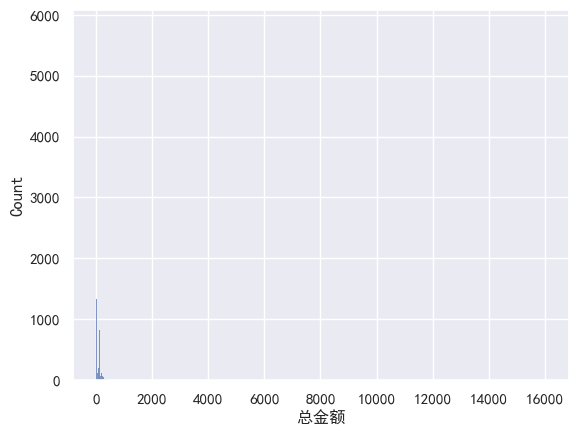

In [26]:
sns.histplot(data['总金额'])
plt.show()


总金额500以上的数据虽然很少但刻度很大，包含进来严重拉伸了图形，不利于分析。
筛选总金额500以内的数据，绘制直方图查看分布。

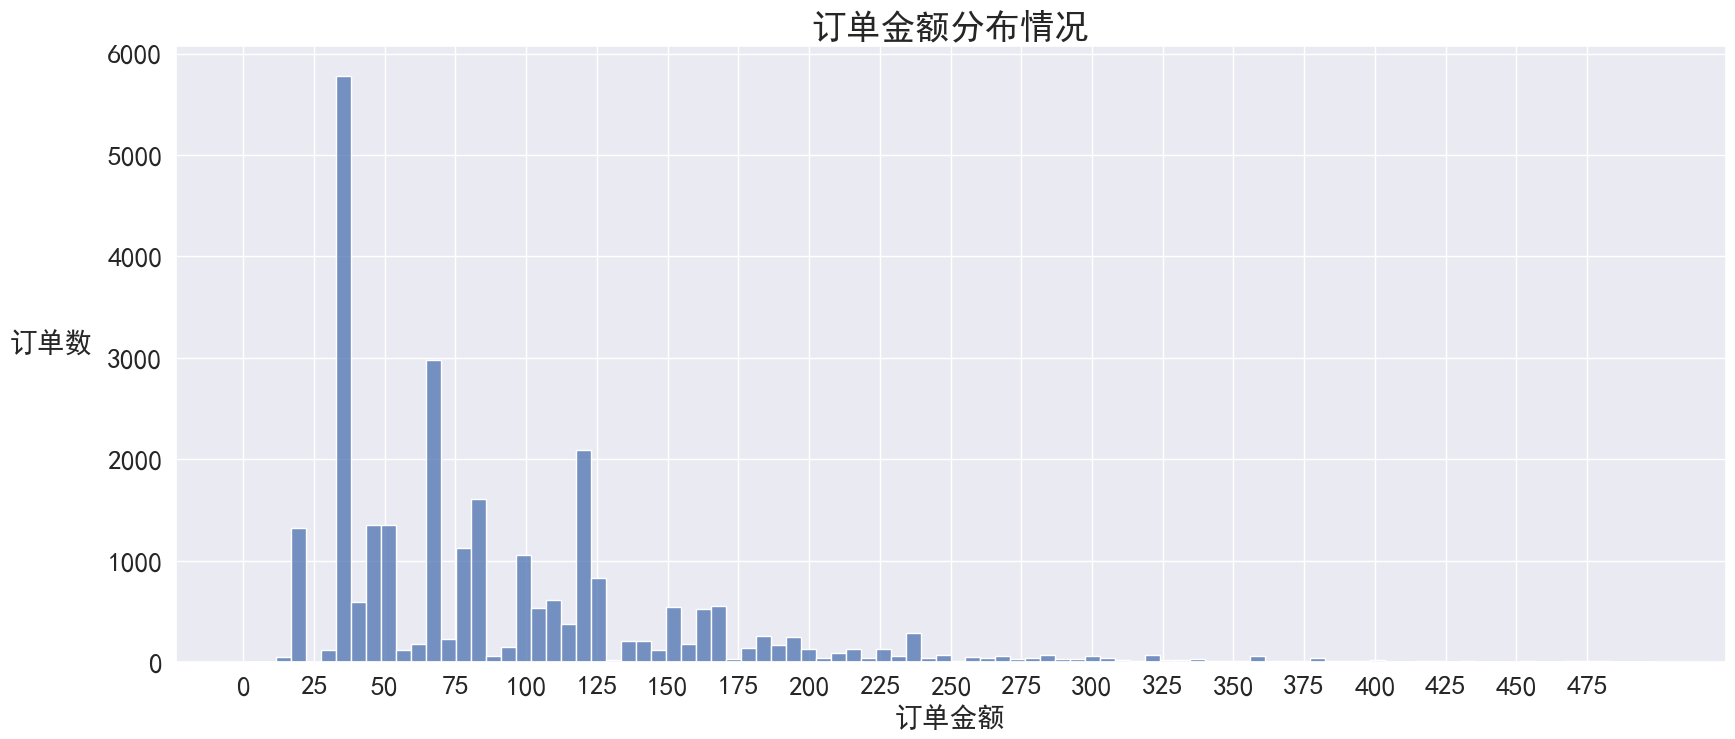

In [27]:
plt.figure(figsize=(20,8),dpi=100)
sns.histplot(data[data['总金额'] < 500]['总金额'])
plt.xticks(np.arange(0,500,step=25), fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('订单金额',fontsize=20)
plt.ylabel('订单数',fontsize=20, rotation=0, labelpad=40)
plt.title('订单金额分布情况', fontsize=25)
plt.show()


可以看到大部分订单金额在200元以下，20~125居多。
根据上图的分布，对订单总金额进行分组

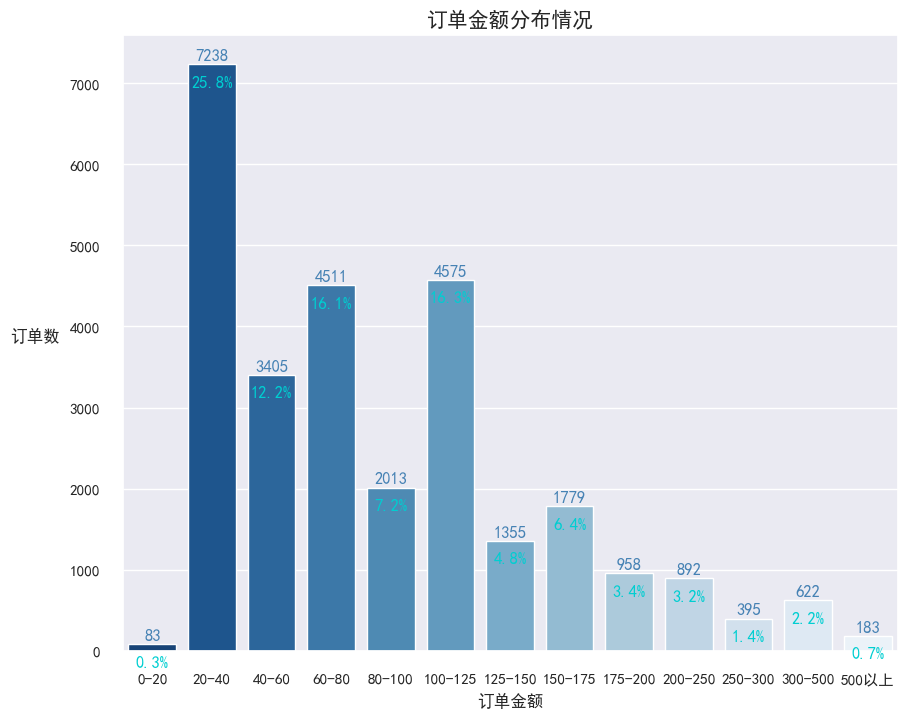

In [28]:
price_max = data['总金额'].max()
bins = [0, 20, 40, 60, 80, 100, 125, 150, 175, 200, 250, 300, 500, price_max]
price_label = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-125','125-150','150-175',
               '175-200', '200-250', '250-300', '300-500', '500以上']
price_cut = [pd.cut(data['总金额'], bins=bins, labels=price_label).value_counts()[i] for i in price_label]
x = [i for i in range(len(price_label))]
plt.figure(figsize=(10,8),dpi=100)
sns.barplot(x=x, y=price_cut, hue=price_label, palette='Blues_r', legend=False)
for i,j in zip(x, price_cut):
    plt.text(i, j+50, j, horizontalalignment='center',fontdict=dict(color='steelblue'))
    plt.text(i, j-280, '{:.1%}'.format(j/data.shape[0]), horizontalalignment='center',fontdict=dict(color='darkturquoise'))
plt.xticks(ticks=x, labels=price_label)
plt.tick_params(pad=10)
plt.xlabel('订单金额', fontsize=12)
plt.ylabel('订单数', rotation=0, labelpad=25, fontsize=12)
plt.title('订单金额分布情况', fontsize=15)
plt.show()


大部分订单金额在200元以下，尤其是20~125元；
其中以20-40元的订单量最多，占了总订单量的1/4；
20元以下和175元以上的订单很少，加起来仅占总订单量的11%；
即20-175元的订单占了总订单量的近90%。

建议：
产品推广以价格20-125元或20-175元的产品为主，尤其着重推广20-40元的产品，这个价格区间的产品是消费者最喜欢消费的。

地区分析——按照各省市查看销售额

C:\Users\54908\AppData\Local\Temp\ipykernel_24348\1760252860.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




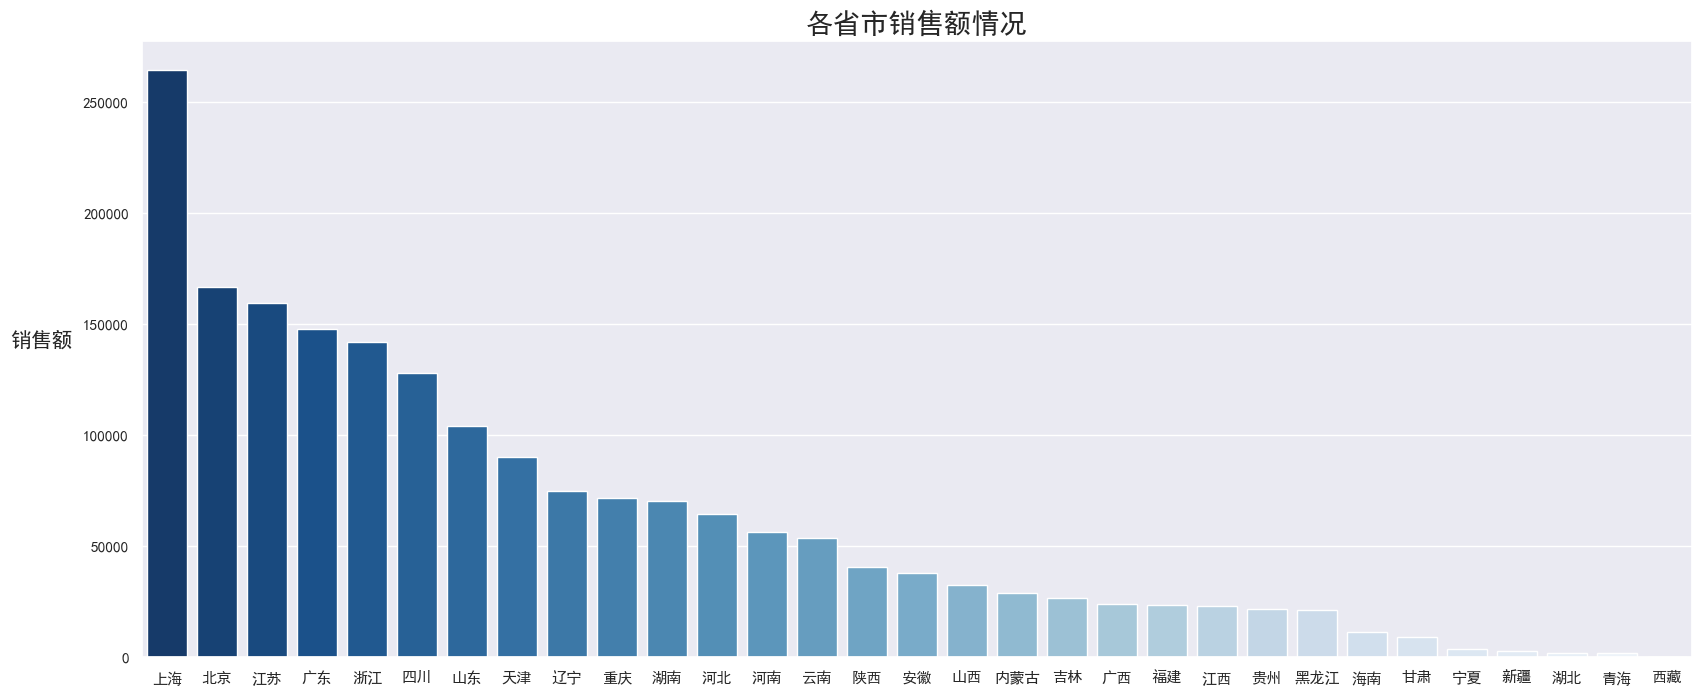

In [29]:
data_area = data.groupby('收货地址')['买家实际支付金额'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(20,8), dpi=100)
sns.barplot(x='收货地址', y='买家实际支付金额', data=data_area, palette='Blues_r')
plt.xlabel('')
plt.ylabel('销售额', rotation=0, labelpad=30, fontsize=15)
plt.title('各省市销售额情况', fontsize=20)
plt.show()


In [30]:
from pyecharts.charts import Map
from pyecharts import options as opts

data_area_list = [list(i) for i in zip(data_area['收货地址'], np.round(data_area['买家实际支付金额']))]
map = Map()
map.add("销售额", data_area_list, maptype='china', is_map_symbol_show=True)
map.set_global_opts(title_opts=opts.TitleOpts(title='各省市销售额'), 
                    visualmap_opts=opts.VisualMapOpts(min_=0, max_=270000, range_color=['#FF0000', '#0000FF']),
                    legend_opts=opts.LegendOpts(is_show=False))
map.render_notebook()



转化率分析：
用户行为路径为：创建订单 -> 订单付款 -> 订单成交 -> 订单全额成交

In [31]:
# 计算各个阶段订单数
data_create = data.shape[0]
data_pay = data[~data['订单付款时间'].isnull()].shape[0]
data_pay_part = data[data['买家实际支付金额'] > 0].shape[0]
data_pay_all = data[data['买家实际支付金额'] == data['总金额']].shape[0]

# 计算转化率
data_funnel = pd.DataFrame()
data_funnel['环节'] = ['下单', '付款', '成交', '全额成交']
data_funnel['订单量'] = [data_create, data_pay, data_pay_part, data_pay_all]
data_funnel['总体转化率%'] = np.round(data_funnel['订单量'] / data_funnel['订单量'][0], 3)*100
data_funnel['付款订单转化率%'] = np.round(data_funnel['订单量'] / data_funnel['订单量'][1], 3)*100
data_funnel.loc[0,'付款订单转化率%'] = np.nan
data_funnel


,环节,订单量,总体转化率%,付款订单转化率%
0,下单,28009,100.0,NaN
1,付款,24087,86.0,100.0
2,成交,18955,67.7,78.7
3,全额成交,18441,65.8,76.6


In [32]:
from pyecharts.charts import Funnel, Page
page=Page()

#绘制总转化率漏斗图
funnel1 = Funnel(init_opts=opts.InitOpts(width="600px", height="400px"))
funnel1.add(series_name="转化率", 
           data_pair=list(zip(data_funnel['环节'],data_funnel['总体转化率%'])),
           gap=2,
           label_opts=opts.LabelOpts(position='inside', formatter='{b}：{c}%'),
           tooltip_opts=opts.TooltipOpts(formatter='{a} <br/>{b} : {c}%'))
funnel1.set_colors(colors=['#B0CDDD', '#5C96BB', '#3470A3', '#163A69'])
funnel1.set_global_opts(title_opts=opts.TitleOpts(title='总体转化率', subtitle='相比总下单数'),
                        legend_opts=opts.LegendOpts(is_show=False))
page.add(funnel1)

# 绘制付款订单转化率漏斗图
funnel2 = Funnel(init_opts=opts.InitOpts(width="600px", height="400px"))
funnel2.add(series_name="转化率", 
            data_pair=list(zip(data_funnel['环节'][1:],data_funnel['付款订单转化率%'][1:])),
            sort_='none',
            gap=2,
            label_opts=opts.LabelOpts(position='inside', formatter='{b}：{c}%'),
            tooltip_opts=opts.TooltipOpts(formatter='{a} <br/>{b} : {c}%'))
funnel2.set_colors(colors=['#ffd460', '#ffaa64', '#ff8264'])
funnel2.set_global_opts(title_opts=opts.TitleOpts(title='付款订单转化率', subtitle='相比付款订单数'),
                        legend_opts=opts.LegendOpts(is_show=False))
page.add(funnel2)
page.render_notebook()


从上面的漏斗图我们可以知道：
###### 下单订单的付款率为86%；付款订单里78.7%的订单支付金额大于0元；付款订单里76.6%的订单为全额成交，即有100%-78.7%=23.4%的订单存在退款行为；

分析：
###### 78.7%与76.6%比较接近，说明绝大部分的退款行为是部分退款。付款订单里23.4%的订单存在退款行为，接近每4个订单就有一个有申请退款，其中绝大部分只退部分款项，这部分买家应该是保留了商品，但是对商品不太满意，只有很少买家对商品非常不满意或者不合适等原因全额退款；前文提到90%的订单商品价格在20-175元之间，中低的价格加上23.4%的退款率，说明我们的商品虽然具有价格优势，可是质量或其他方面存在令人不满意的地方（简单理解4个人里就有一个人对产品不满意，是比较严重的问题）。

建议：
###### 23.4%的退款率说明商品存在的问题比较严重，应尽快找出问题所在（质量不达标、实物与图片不符、尺寸与标注不符、包装不好导致商品破损、快递运输过慢、发货出错、价格高于其他店铺…）；计算后可知，假设退款率为0，销售额将能提高30%，当然实际并不可能达到退款率为0，但是假如解决了商品存在的问题后，退款率降至10%，销售额将能提高17%，退款率降得越低，销售额提升越多。

# 总结
###### 2月总销售额为190.25万元。

###### 为了增加销售，可以从以下几方面开展行动：
###### 找到导致高退款率的原因并解决，这是目前最重要的事情；
###### 促销活动可以安排在周五开始；
###### 促销信息、产品推广广告的推送时间最好安排在晚上9点，其次是10点、15点；
###### 产品推广以价格20-125元或20-175元的产品为主，尤其着重推广20-40元的产品；
###### 保持优势省市的订单量，大力发展西南、中部以及东北地区的销量。